# Note

This notebook uses `sklearn.model_selection.StratifiedGroupKFold` which is implemented in scikit-learn version 0.24.2.  
This version is __development version__ when this notebook is created and cannot coexist other important libraries such as lightgbm, therefore, virtual environment was needed to be isolated. Required packages are listed in "requerements_sklearn_dev.txt".

In [1]:
# !pip freeze > requerements_sklearn_dev.txt

In [2]:
SEED = 2
N_SPLITS = 5

In [3]:
import os
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedGroupKFold

SCRIPTS_DIR = 'scripts'
assert(os.path.isdir(SCRIPTS_DIR))
if SCRIPTS_DIR not in sys.path: sys.path.append(SCRIPTS_DIR)
from folder import Folder

In [4]:
train = pd.read_csv(os.path.join(Folder.CSV, 'train.csv'))

In [5]:
train

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3
...,...,...,...,...
3932,ffa3259fff8e6f3818a1,1850,b187c294b0550acf049a,3
3933,ffd4d361756587883e48,1670,ad49a044770a48f860a6,1
3934,ffd794b7b311b7b7fd92,1789,f030a01b480b18a27be2,2
3935,ffe49bba69d06446de7e,1805,f5287bc84a05aada1d17,3


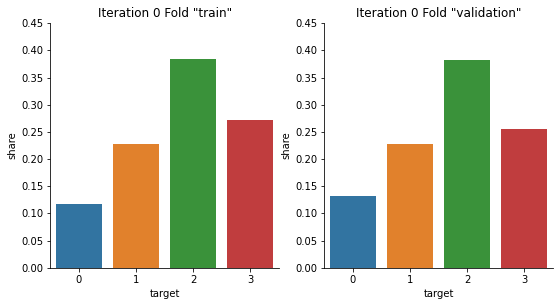

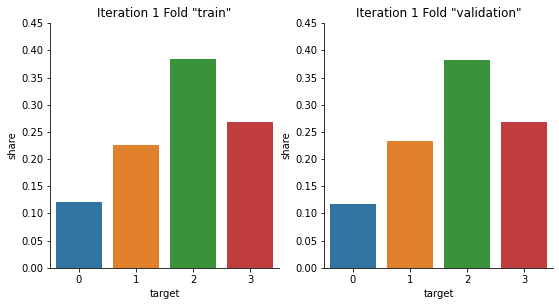

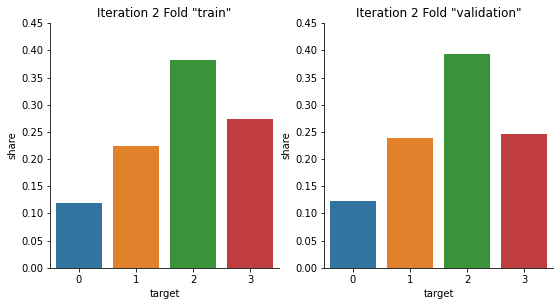

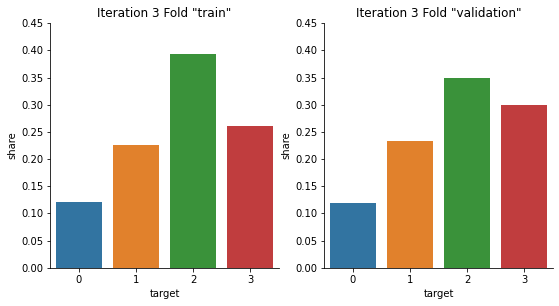

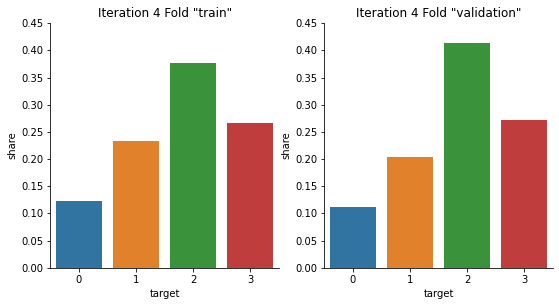

In [6]:
train_object_id, valid_object_id = [], []
splitter = StratifiedGroupKFold(n_splits=N_SPLITS, random_state=SEED, shuffle=True)
for i, (train_idx, valid_idx) in enumerate(splitter.split(X=train, y=train['target'], groups=train['art_series_id'])):
    plt.figure(figsize=(9.0, 4.5))
    train_ = train.iloc[train_idx]
    valid_ = train.iloc[valid_idx]
    assert(set(train_['art_series_id'].tolist()) & set(valid_['art_series_id'].tolist()) == set())
    for j, (fold, df) in enumerate(zip(['train', 'validation'], [train_, valid_])):
        plt.subplot(1, 2, j + 1)
        share = df['target'].value_counts(normalize=True).sort_index().reset_index()
        share.columns = ['target', 'share']
        ax = sns.barplot(data=share, x='target', y='share')
        ax.set_title(f'Iteration {i} Fold "{fold}"')
        ax.set_ylim(0.0, 0.45)
        sns.despine()
    train_object_id.append(train_['object_id'].tolist())
    valid_object_id.append(valid_['object_id'].tolist())

In [7]:
os.makedirs(Folder.FOLD, exist_ok=True)
with open(os.path.join(Folder.FOLD, 'train_validation_object_ids.pkl'), 'wb') as f:
    fold_object_id = {}
    fold_object_id['training'] = train_object_id
    fold_object_id['validation'] = valid_object_id
    pickle.dump(fold_object_id, f)

In [8]:
with open(os.path.join(Folder.FOLD, 'train_validation_object_ids.pkl'), 'rb') as f:
    fold_object_id = pickle.load(f)